In [11]:
# 04_hierarchical_demo.ipynb (Python Code exportiert als Skript zur Vorlage)

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from planners.visibility_prm import VisibilityPRM
from planners.hierarchical_planner import HierarchicalPlanner
from planners.lazy_prm import LazyPRM
from planners.basic_prm import BasicPRM
from utils.visibility_prm_visualize import visibility_prm_visualize
from utils.hierarchical_visualize import visualize_hierarchical_planning
from utils.collision_checker import CollisionChecker
from environment import get_all_scenes
import time
import pandas as pd
from scipy.spatial.distance import euclidean

In [15]:
# ---- Konfiguration für den globalen Planer (VisibilityPRM) ----
config_high = {
    "ntry": 50
}

config_low_lazy = {
    "initialRoadmapSize": 50,
    "updateRoadmapSize": 10,
    "kNearest": 8,
    "maxIterations": 10
}

config_low_basic = {
    "numNodes": 50,
    "radius": 4
}

scenes = get_all_scenes()

In [16]:
import os
import matplotlib.pyplot as plt

# 📁 Ordner für Plots & Ergebnisse
plot_dir = "plots_hierarchical"
results_dir = "benchmark_results"
os.makedirs(plot_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

# ---- Benchmark-Runner ----
def run_benchmark(subplanner_type, config_local):
    results = []
    SubPlanner = LazyPRM if subplanner_type == "Lazy" else BasicPRM
    print(f"\n🔁 Starte Benchmarks mit Subplanner: {subplanner_type}")

    for scene_name, (scene, limits, (start_pos, goal_pos)) in scenes:
        print(f"\n🔍 Szene: {scene_name}")
        start = [list(start_pos)]
        goal = [list(goal_pos)]

        collision_checker = CollisionChecker(scene, limits)

        planner = HierarchicalPlanner(
            scene=scene,
            limits=limits,
            GlobalPlannerClass=VisibilityPRM,
            LocalPlannerClass=SubPlanner,
            config_global=config_high,
            config_local=config_local
        )

        t0 = time.time()
        path = planner.plan_path(start, goal)
        t1 = time.time()

        coords = planner.get_solution_path() if path else []
        euclidean_length = sum(euclidean(a, b) for a, b in zip(coords[:-1], coords[1:])) if coords else 0

        if not path:
            print(f"❌ Kein Pfad gefunden in Szene: {scene_name}")
            result = {
                "planner": f"Hierarchical-{subplanner_type}",
                "scene": scene_name,
                "hasPath": False,
                "length": 0,
                "euclidean_length": 0,
                "time": t1 - t0,
                "nodes": 0,
                "edges": 0,
                "roadmap_size": 0
            }
            results.append(result)
            continue

        print(f"✅ Pfad gefunden in Szene: {scene_name}, Länge: {len(path)}")
        planner.solution_path = path
        planner.graph = planner.global_planner.graph

        # 📸 Visualisierung speichern
        visualize_hierarchical_planning(planner, collision_checker, config_local)
        filename = f"{scene_name}_Hierarchical-{subplanner_type}.png".replace(" ", "_")
        plt.savefig(os.path.join(plot_dir, filename), dpi=300)
        plt.close()

        result = {
            "planner": f"Hierarchical-{subplanner_type}",
            "scene": scene_name,
            "hasPath": True,
            "length": len(path),
            "euclidean_length": euclidean_length,
            "time": t1 - t0,
            "nodes": len(planner.graph.nodes),
            "edges": len(planner.graph.edges),
            "roadmap_size": planner.graph.size()
        }
        results.append(result)

    return results



🔁 Starte Benchmarks mit Subplanner: Lazy

🔍 Szene: U-Shape
Globaler Pfad: ['start', 0, 29, 'goal']
Koordinaten des globalen Pfads: [[2.0, 20.0], array([0.05280584, 6.39482842]), array([20.46446105,  3.15316539]), [20.0, 2.0]]
Segment 0: [2.0, 20.0] → [0.05280584 6.39482842]
→ Lokaler Planner für Segment 0: [2.0, 20.0] → [0.05280584 6.39482842]
   Lokale Begrenzung (geclipped): ((0, np.float64(9.026402920006154)), (np.float64(5.197414209548786), np.float64(21.197414209548786)))
Segment 1: [0.05280584 6.39482842] → [20.46446105  3.15316539]
→ Lokaler Planner für Segment 1: [0.05280584 6.39482842] → [20.46446105  3.15316539]
   Lokale Begrenzung (geclipped): ((np.float64(2.258633445738724), np.float64(18.258633445738724)), (0, np.float64(12.773996904915535)))
Segment 2: [20.46446105  3.15316539] → [20.0, 2.0]
→ Lokaler Planner für Segment 2: [20.46446105  3.15316539] → [20.0, 2.0]
   Lokale Begrenzung (geclipped): ((np.float64(18.98904329658579), np.float64(21.475417754879352)), (np.floa

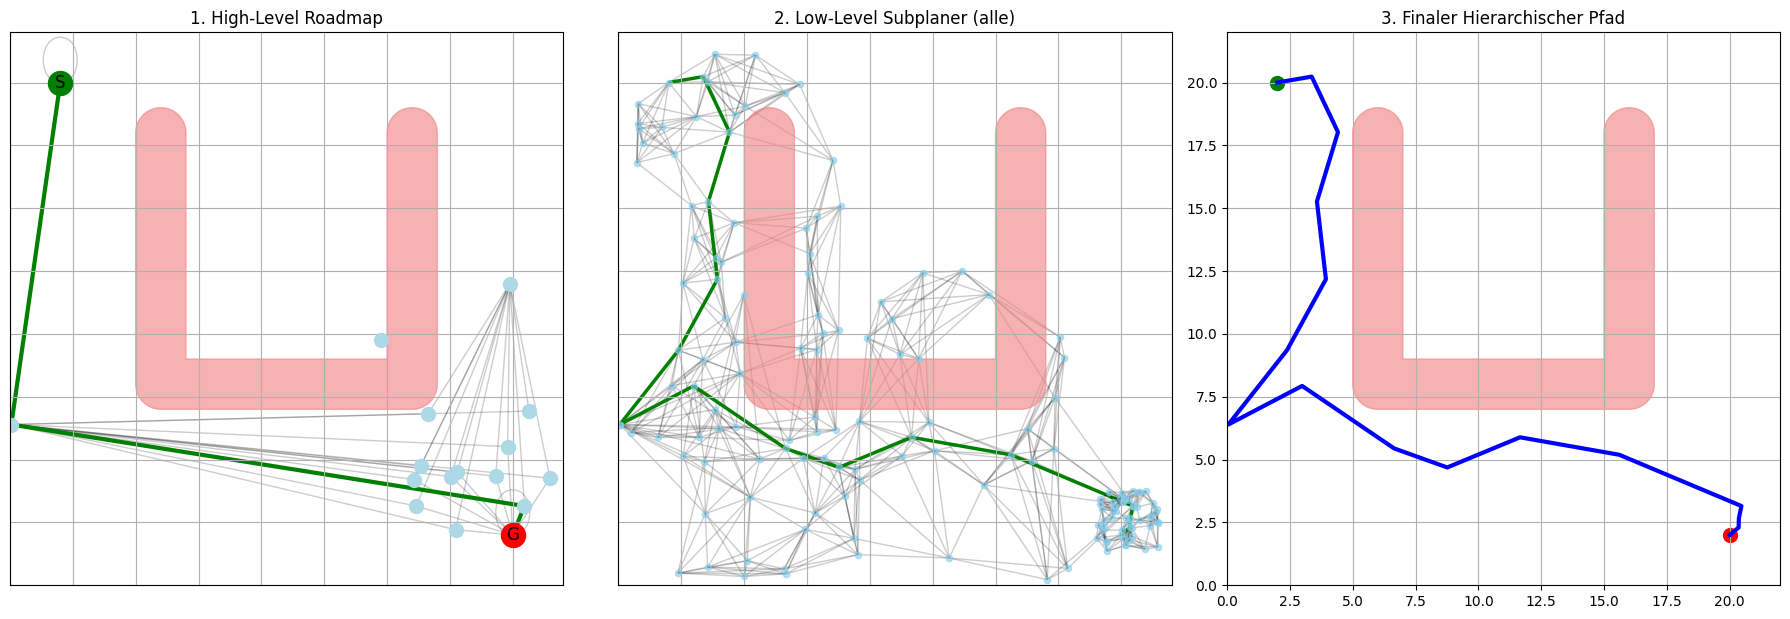


🔍 Szene: L-Shape
Globaler Pfad: ['start', 19, 1, 43, 'goal']
Koordinaten des globalen Pfads: [[2.0, 2.0], array([2.11875843, 2.35770027]), array([15.55723634,  1.874219  ]), array([18.97739257, 14.93640163]), [15.0, 15.0]]
Segment 0: [2.0, 2.0] → [2.11875843 2.35770027]
→ Lokaler Planner für Segment 0: [2.0, 2.0] → [2.11875843 2.35770027]
   Lokale Begrenzung (geclipped): ((np.float64(1.5593792125862294), np.float64(2.5593792125862294)), (np.float64(1.6788501344824613), np.float64(2.6788501344824613)))
Segment 1: [2.11875843 2.35770027] → [15.55723634  1.874219  ]
→ Lokaler Planner für Segment 1: [2.11875843 2.35770027] → [15.55723634  1.874219  ]
   Lokale Begrenzung (geclipped): ((np.float64(0.8379973801785319), np.float64(16.837997380178532)), (0, np.float64(10.11595963538798)))
Segment 2: [15.55723634  1.874219  ] → [18.97739257 14.93640163]
→ Lokaler Planner für Segment 2: [15.55723634  1.874219  ] → [18.97739257 14.93640163]
   Lokale Begrenzung (geclipped): ((np.float64(9.26731

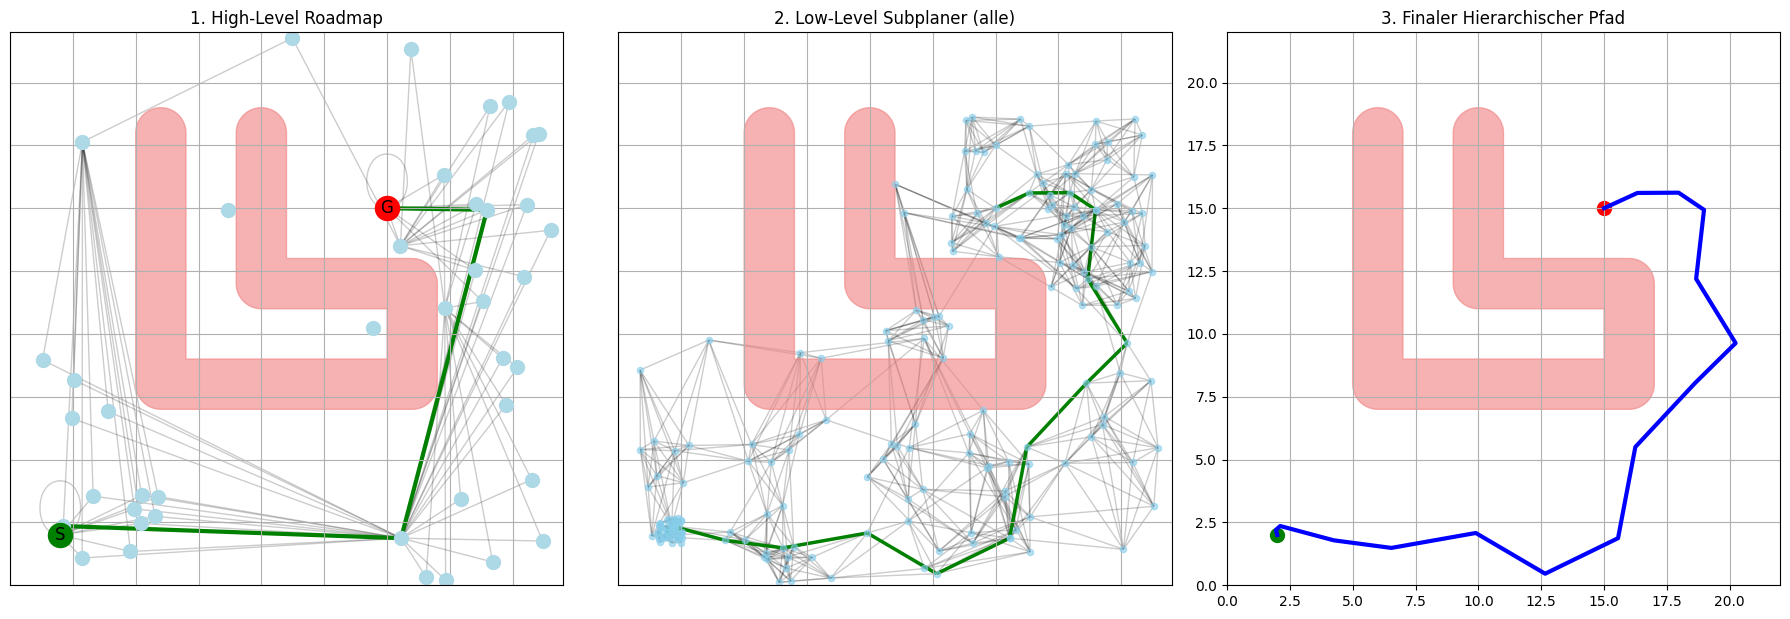


🔍 Szene: Corridor
Kein Pfad im Sichtbarkeitsgraph gefunden.
❌ Kein Pfad gefunden in Szene: Corridor

🔍 Szene: Complex Shape
Globaler Pfad: ['start', 6, 1, 4, 0, 28, 'goal']
Koordinaten des globalen Pfads: [[5.0, 5.0], array([3.4064023 , 4.67153342]), array([ 4.59056638, 15.9380602 ]), array([ 1.21917465, 21.65747171]), array([17.00022627, 20.05506428]), array([17.95048454,  8.77421732]), [17.5, 5.0]]
Segment 0: [5.0, 5.0] → [3.4064023  4.67153342]
→ Lokaler Planner für Segment 0: [5.0, 5.0] → [3.4064023  4.67153342]
   Lokale Begrenzung (geclipped): ((np.float64(2.5761043724562205), np.float64(5.830297927077791)), (np.float64(3.208669934494756), np.float64(6.462863489116327)))
Segment 1: [3.4064023  4.67153342] → [ 4.59056638 15.9380602 ]
→ Lokaler Planner für Segment 1: [3.4064023  4.67153342] → [ 4.59056638 15.9380602 ]
   Lokale Begrenzung (geclipped): ((0, np.float64(11.998484340296592)), (np.float64(2.304796809512835), np.float64(18.304796809512837)))
Segment 2: [ 4.59056638 15.9

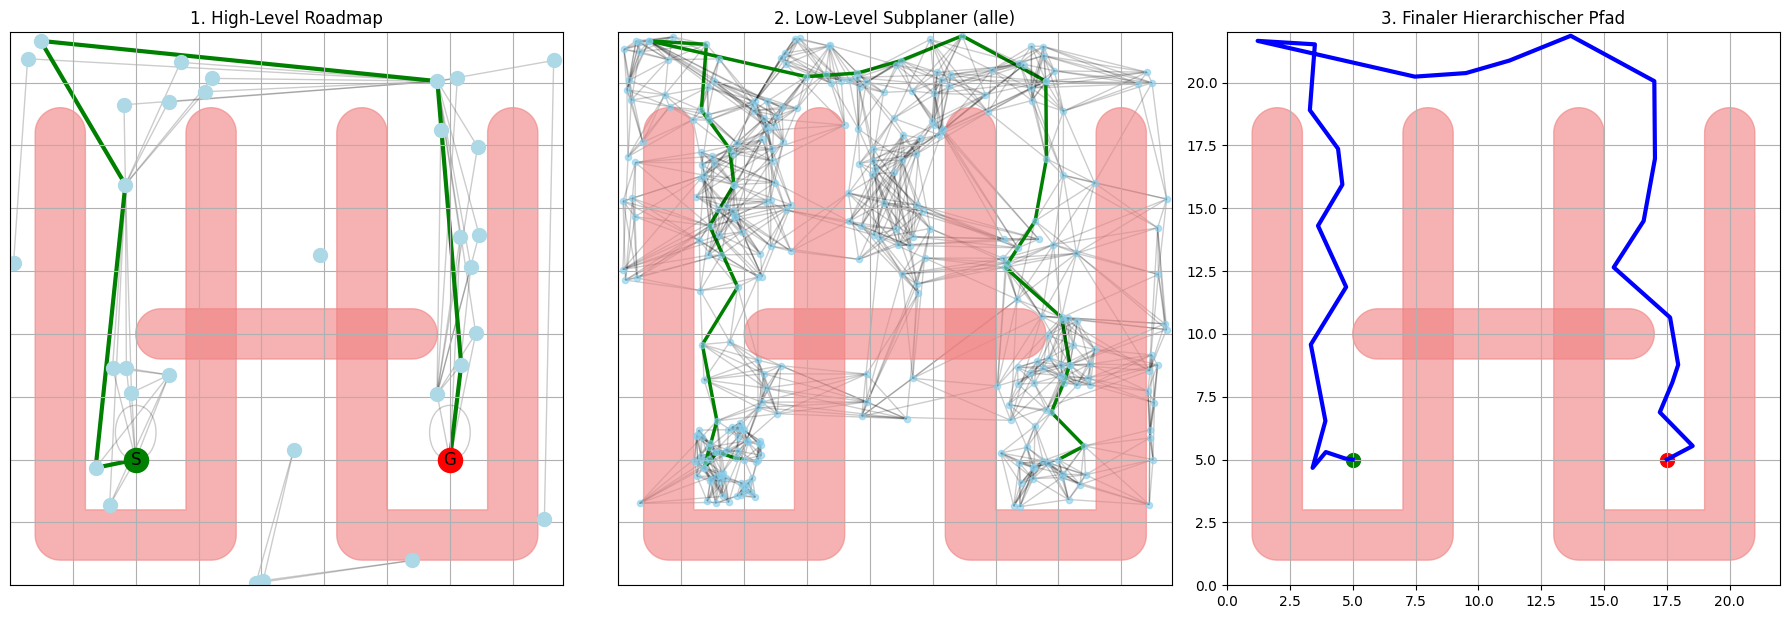


🔍 Szene: Multiple Obstacles
Globaler Pfad: ['start', 7, 43, 34, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([4.30445953, 0.46713021]), array([5.88674927, 2.49011785]), array([ 5.10186284, 19.60515516]), [5.0, 21.0]]
Segment 0: [1.0, 1.0] → [4.30445953 0.46713021]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [4.30445953 0.46713021]
   Lokale Begrenzung (geclipped): ((0, np.float64(5.999378255143618)), (0, np.float64(4.080713594086371)))
Segment 1: [4.30445953 0.46713021] → [5.88674927 2.49011785]
→ Lokaler Planner für Segment 1: [4.30445953 0.46713021] → [5.88674927 2.49011785]
   Lokale Begrenzung (geclipped): ((np.float64(2.52731317852345), np.float64(7.6638956213652545)), (0, np.float64(4.0469152503812955)))
Segment 2: [5.88674927 2.49011785] → [ 5.10186284 19.60515516]
→ Lokaler Planner für Segment 2: [5.88674927 2.49011785] → [ 5.10186284 19.60515516]
   Lokale Begrenzung (geclipped): ((0, np.float64(13.494306055150924)), (np.float64(3.0476365039734468), np.float64

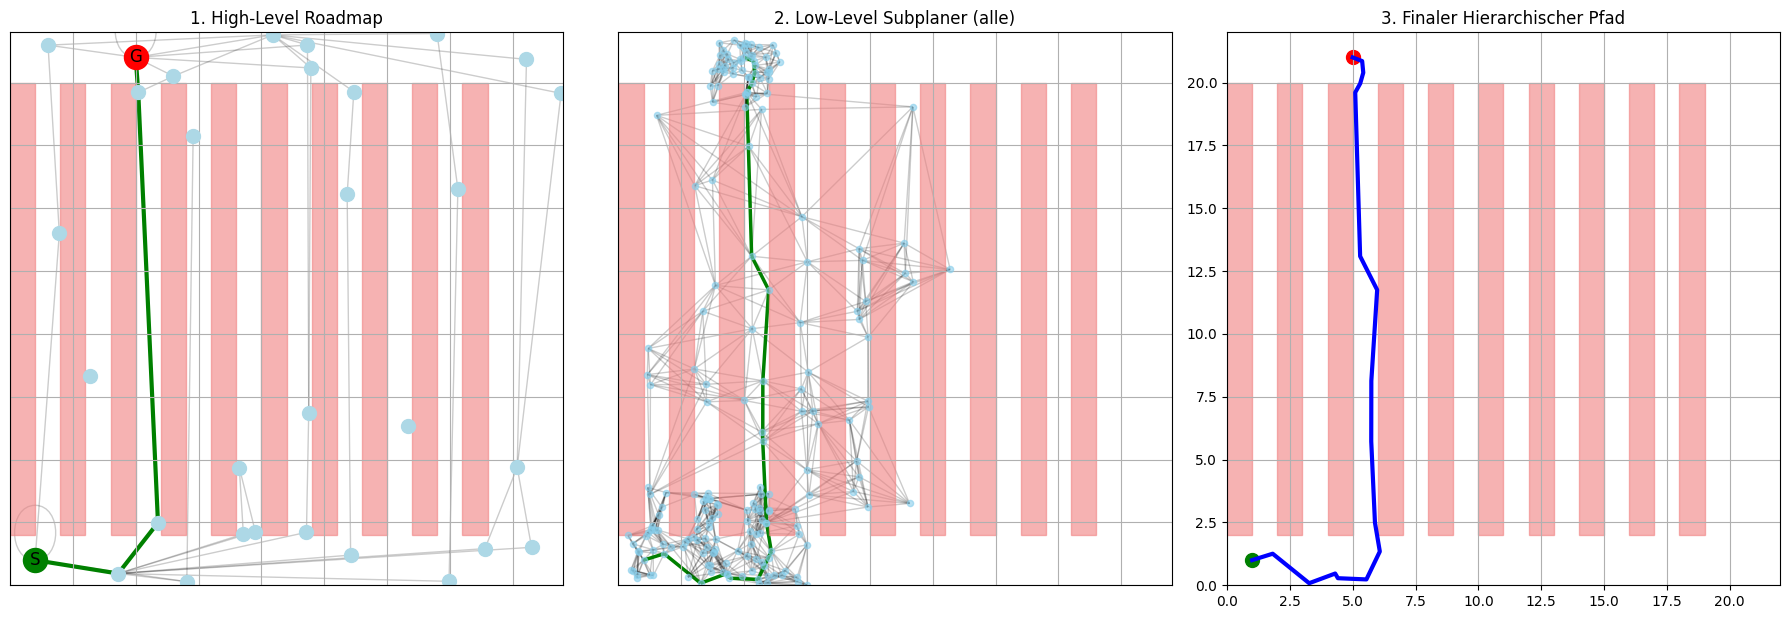


🔍 Szene: Crossed Obstacles
Globaler Pfad: ['start', 116, 3, 90, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([2.67333763, 0.84768396]), array([20.65743111,  4.59901361]), array([20.43205652, 21.14729134]), [20.5, 21.0]]
Segment 0: [1.0, 1.0] → [2.67333763 0.84768396]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [2.67333763 0.84768396]
   Lokale Begrenzung (geclipped): ((np.float64(0.15641318151028227), np.float64(3.516924444942422)), (0, np.float64(2.6040976120937094)))
Segment 1: [2.67333763 0.84768396] → [20.65743111  4.59901361]
→ Lokaler Planner für Segment 1: [2.67333763 0.84768396] → [20.65743111  4.59901361]
   Lokale Begrenzung (geclipped): ((np.float64(3.6653843662413017), np.float64(19.6653843662413)), (0, np.float64(10.723348783328518)))
Segment 2: [20.65743111  4.59901361] → [20.43205652 21.14729134]
→ Lokaler Planner für Segment 2: [20.65743111  4.59901361] → [20.43205652 21.14729134]
   Lokale Begrenzung (geclipped): ((np.float64(12.544743814882402), 22), 

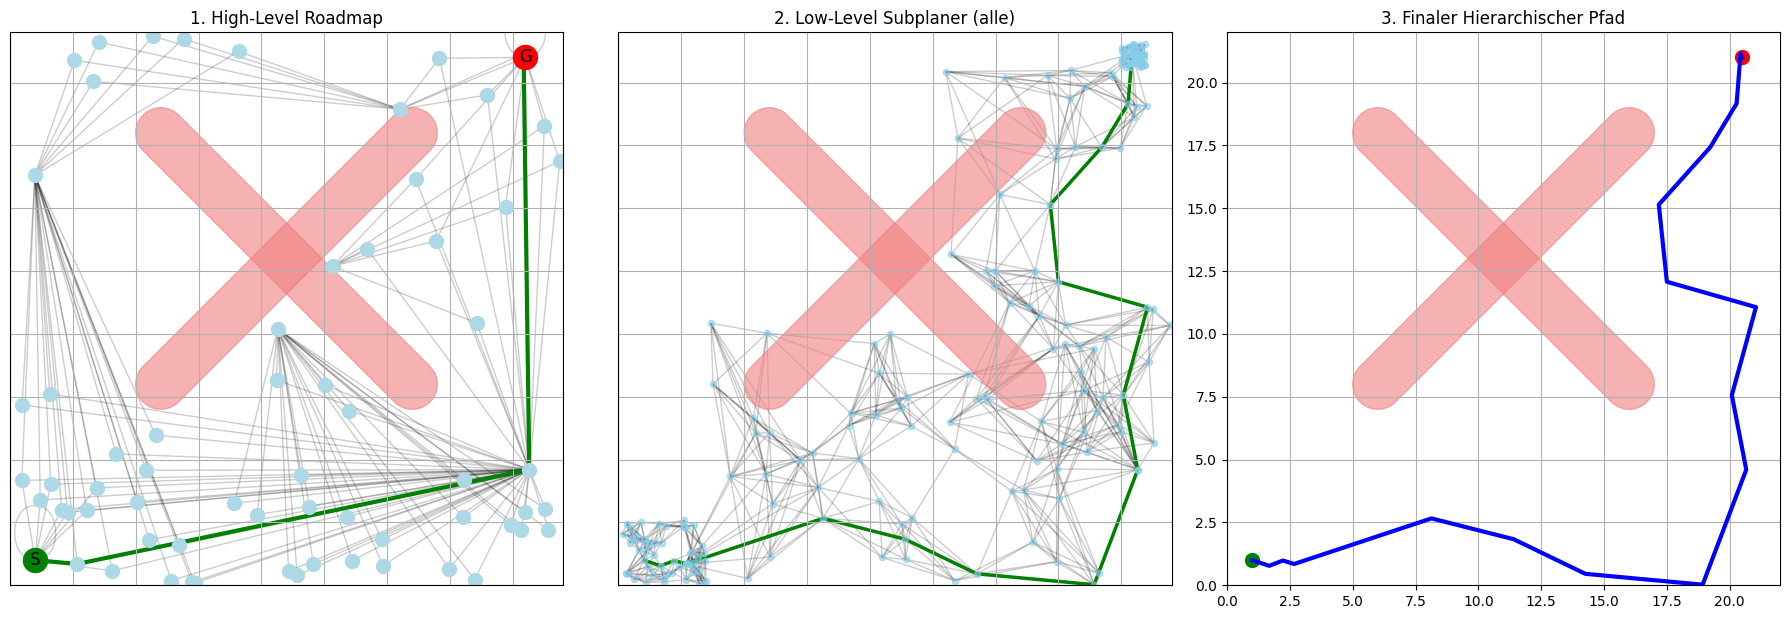


🔍 Szene: Random Obstacles
Globaler Pfad: ['start', 30, 0, 49, 36, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([1.48016835, 0.45899069]), array([13.88947359,  0.65923572]), array([15.09329572,  2.75834331]), array([18.98069274, 18.85909682]), [19.0, 19.0]]
Segment 0: [1.0, 1.0] → [1.48016835 0.45899069]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [1.48016835 0.45899069]
   Lokale Begrenzung (geclipped): ((np.float64(0.5167220824992802), np.float64(1.9634462655633944)), (np.float64(0.006133253709288855), np.float64(1.452857436773403)))
Segment 1: [1.48016835 0.45899069] → [13.88947359  0.65923572]
→ Lokaler Planner für Segment 1: [1.48016835 0.45899069] → [13.88947359  0.65923572]
   Lokale Begrenzung (geclipped): ((0, np.float64(15.68482096820684)), (0, np.float64(8.55911320769322)))
Segment 2: [13.88947359  0.65923572] → [15.09329572  2.75834331]
→ Lokaler Planner für Segment 2: [13.88947359  0.65923572] → [15.09329572  2.75834331]
   Lokale Begrenzung (geclipped): ((

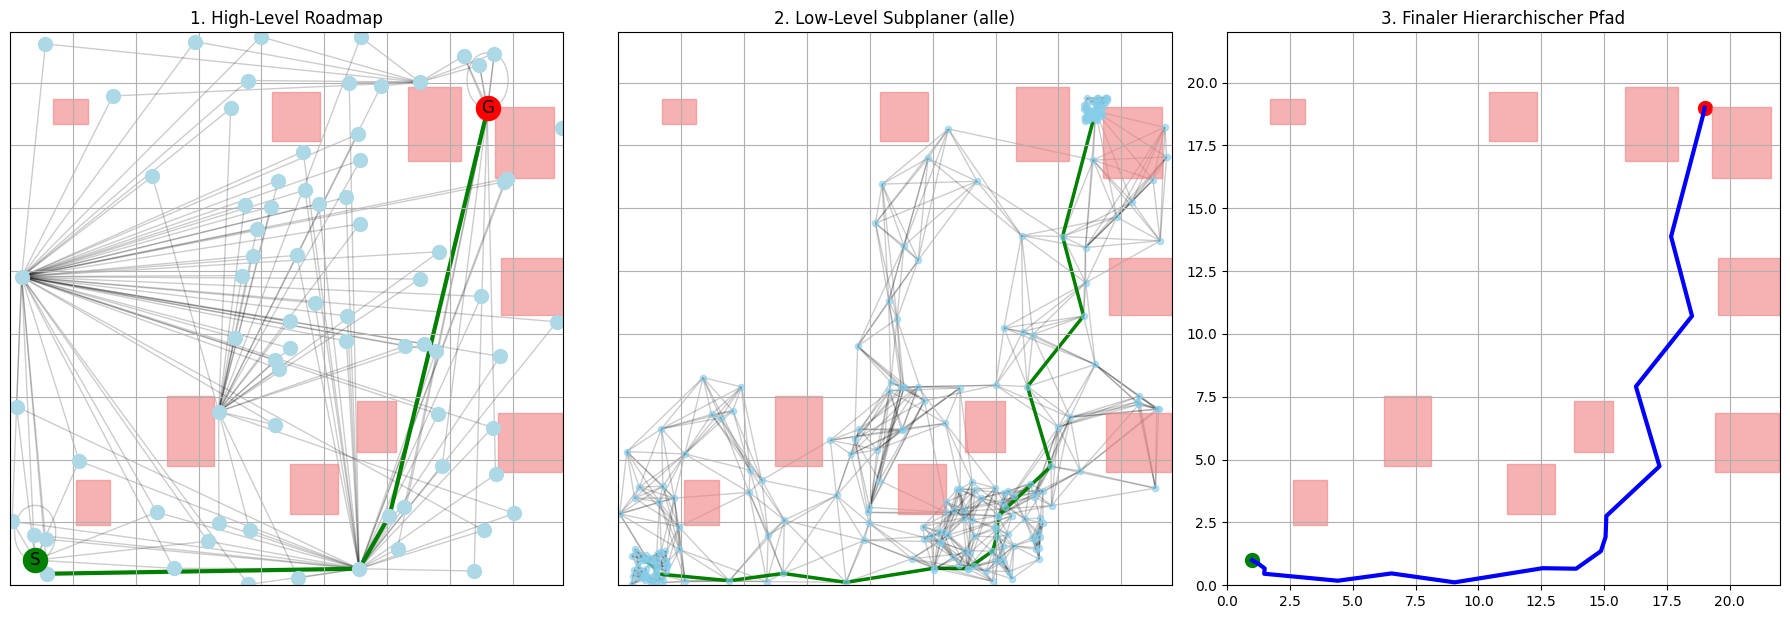


🔁 Starte Benchmarks mit Subplanner: Basic

🔍 Szene: U-Shape
Globaler Pfad: ['start', 60, 'goal']
Koordinaten des globalen Pfads: [[2.0, 20.0], array([20.67186527, 19.34374604]), [20.0, 2.0]]
Segment 0: [2.0, 20.0] → [20.67186527 19.34374604]
→ Lokaler Planner für Segment 0: [2.0, 20.0] → [20.67186527 19.34374604]
   Lokale Begrenzung (geclipped): ((np.float64(3.335932634998141), np.float64(19.33593263499814)), (np.float64(11.671873018459003), 22))
❌ Keine lokale Verbindung zwischen [2.0, 20.0] und [20.67186527 19.34374604].
❌ Kein Pfad gefunden in Szene: U-Shape

🔍 Szene: L-Shape
Globaler Pfad: ['start', 38, 1, 3, 'goal']
Koordinaten des globalen Pfads: [[2.0, 2.0], array([3.36746483, 2.21460799]), array([17.42917981,  0.70321427]), array([19.1770669 , 17.13905373]), [15.0, 15.0]]
Segment 0: [2.0, 2.0] → [3.36746483 2.21460799]
→ Lokaler Planner für Segment 0: [2.0, 2.0] → [3.36746483 2.21460799]
   Lokale Begrenzung (geclipped): ((np.float64(1.2995298832095479), np.float64(4.06793494

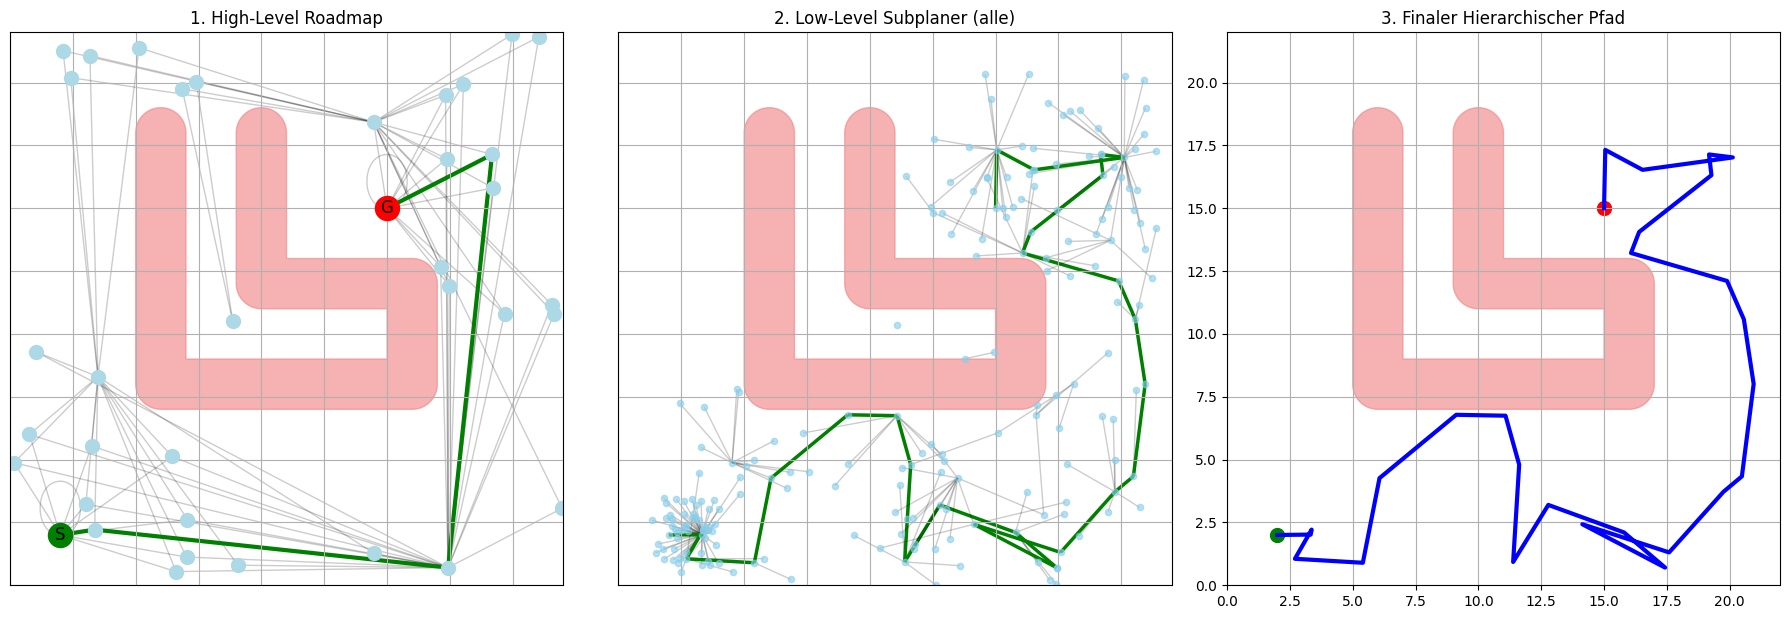


🔍 Szene: Corridor
Kein Pfad im Sichtbarkeitsgraph gefunden.
❌ Kein Pfad gefunden in Szene: Corridor

🔍 Szene: Complex Shape
Globaler Pfad: ['start', 76, 5, 16, 1, 59, 'goal']
Koordinaten des globalen Pfads: [[5.0, 5.0], array([4.10022414, 4.28875835]), array([ 4.14332532, 11.7818202 ]), array([ 6.24161403, 19.31371552]), array([19.64109655, 20.94257498]), array([15.85857707,  4.75811719]), [17.5, 5.0]]
Segment 0: [5.0, 5.0] → [4.10022414 4.28875835]
→ Lokaler Planner für Segment 0: [5.0, 5.0] → [4.10022414 4.28875835]
   Lokale Begrenzung (geclipped): ((np.float64(3.403176463955326), np.float64(5.697047673881681)), (np.float64(3.497443571756924), np.float64(5.791314781683279)))
Segment 1: [4.10022414 4.28875835] → [ 4.14332532 11.7818202 ]
→ Lokaler Planner für Segment 1: [4.10022414 4.28875835] → [ 4.14332532 11.7818202 ]
   Lokale Begrenzung (geclipped): ((0, np.float64(11.614960537604137)), (np.float64(0.5421034681990715), np.float64(15.528475086958304)))
❌ Keine lokale Verbindung 

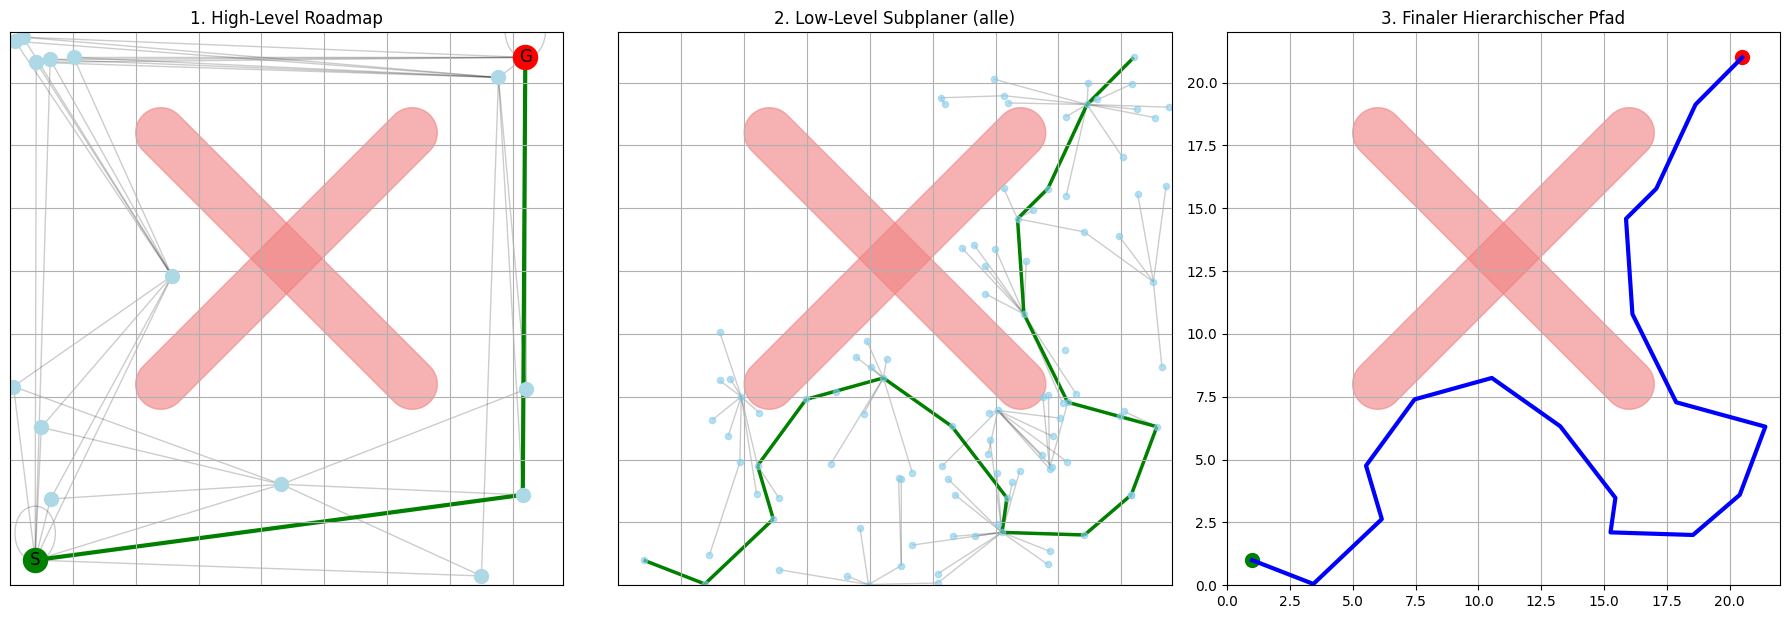


🔍 Szene: Random Obstacles
Globaler Pfad: ['start', 14, 1, 28, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([2.34151385, 4.90570484]), array([11.97486086, 14.58156597]), array([19.20511718, 16.58916507]), [19.0, 19.0]]
Segment 0: [1.0, 1.0] → [2.34151385 4.90570484]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [2.34151385 4.90570484]
   Lokale Begrenzung (geclipped): ((0, np.float64(5.800428788582199)), (0, np.float64(7.082524279249308)))
Segment 1: [2.34151385 4.90570484] → [11.97486086 14.58156597]
→ Lokaler Planner für Segment 1: [2.34151385 4.90570484] → [11.97486086 14.58156597]
   Lokale Begrenzung (geclipped): ((0, np.float64(15.158187358206064)), (np.float64(1.7436354013491098), np.float64(17.74363540134911)))
Segment 2: [11.97486086 14.58156597] → [19.20511718 16.58916507]
→ Lokaler Planner für Segment 2: [11.97486086 14.58156597] → [19.20511718 16.58916507]
   Lokale Begrenzung (geclipped): ((np.float64(8.086185943440483), 22), (np.float64(8.081562440348847), 2

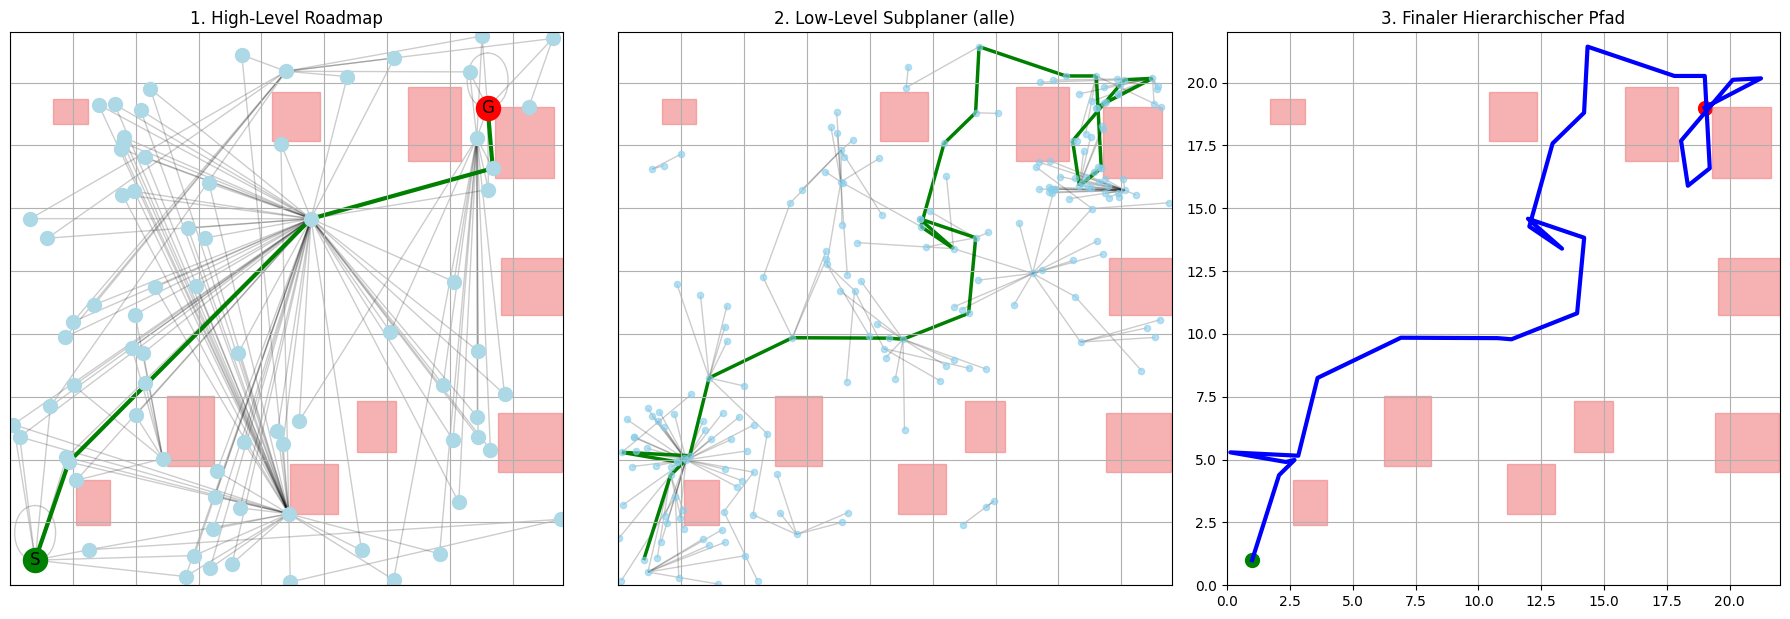


✅ Alle Benchmarks abgeschlossen.


In [17]:
# ---- Beide Varianten durchlaufen ----
all_results = []

# Lazy-Run
lazy_results = run_benchmark("Lazy", config_low_lazy)
lazy_df = pd.DataFrame(lazy_results)
lazy_df.to_csv(os.path.join(results_dir, "Hierarchical-Lazy_results.csv"), index=False)
all_results.extend(lazy_results)

# Basic-Run
basic_results = run_benchmark("Basic", config_low_basic)
basic_df = pd.DataFrame(basic_results)
basic_df.to_csv(os.path.join(results_dir, "Hierarchical-Basic_results.csv"), index=False)
all_results.extend(basic_results)

# Optional: Zusammengefasst
all_df = pd.DataFrame(all_results)
all_df.to_csv(os.path.join(results_dir, "Hierarchical_ALL_results.csv"), index=False)

print("\n✅ Alle Benchmarks abgeschlossen.")

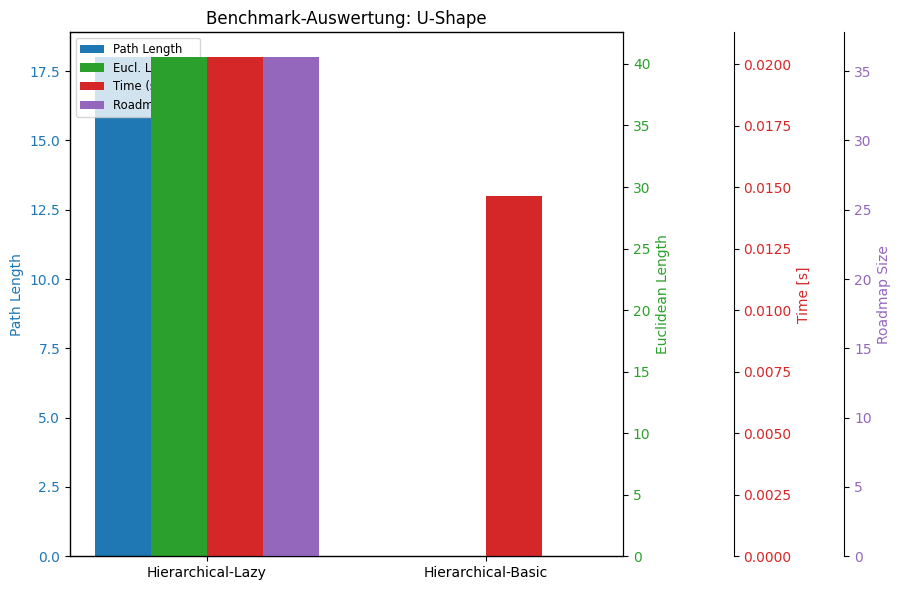

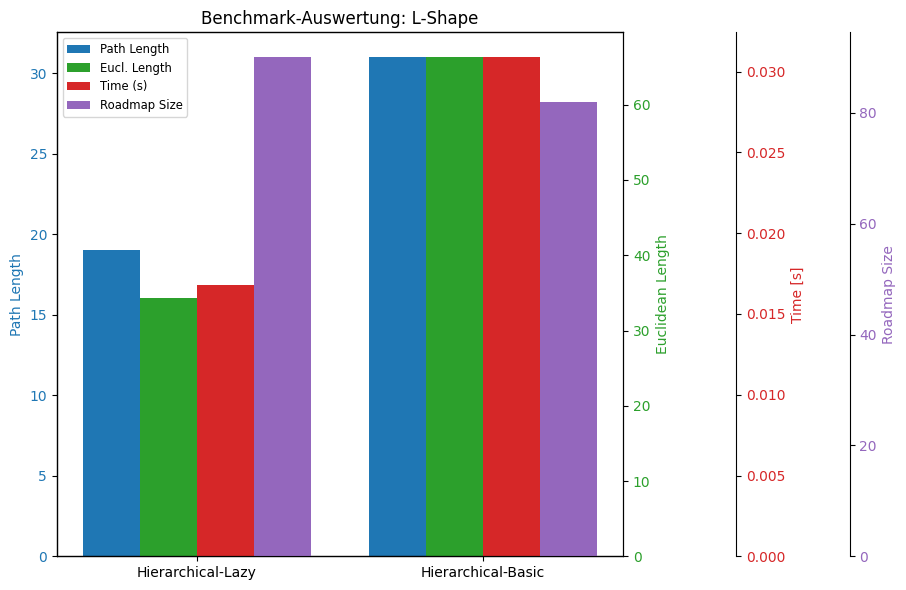

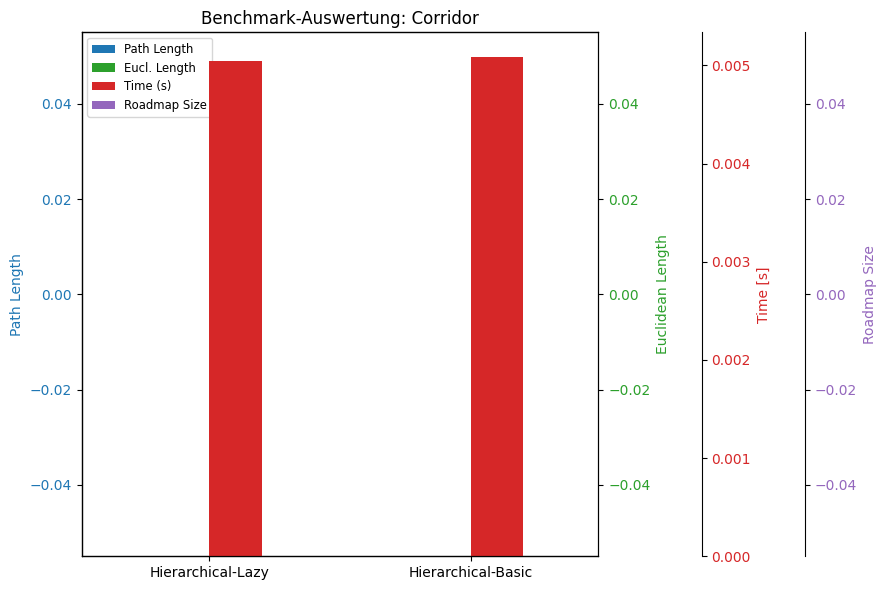

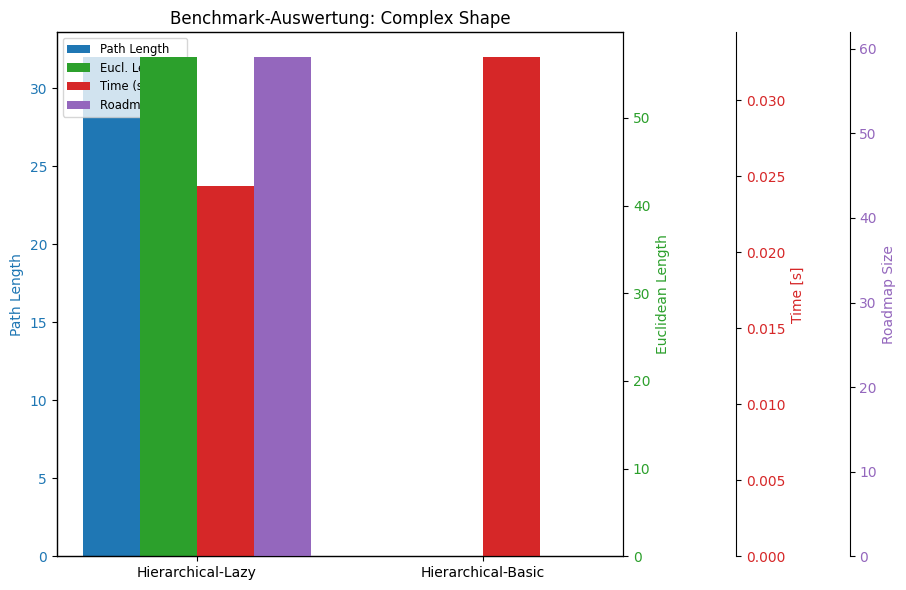

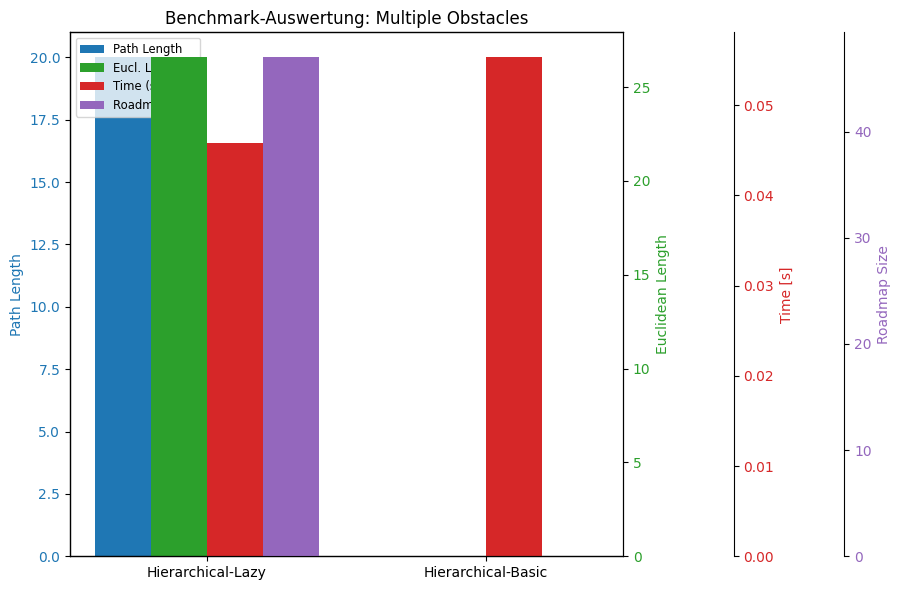

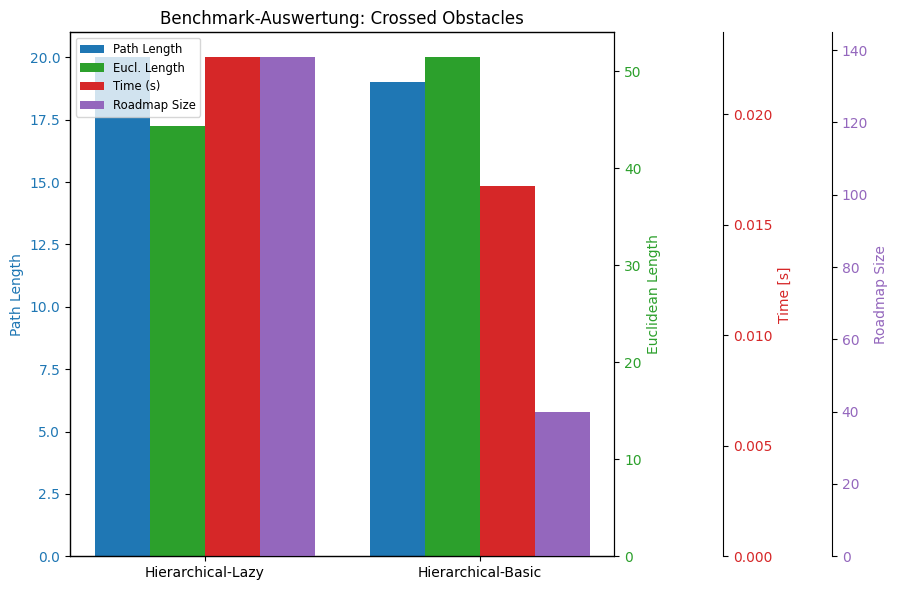

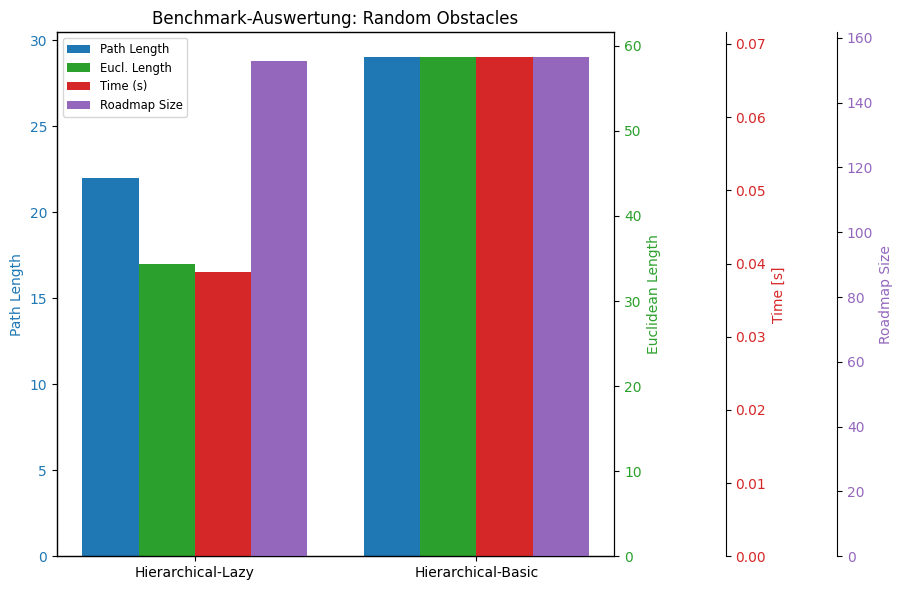

In [19]:
# Visualisierung
result_df = pd.DataFrame(all_results)
for scene in result_df["scene"].unique():
    df = result_df[result_df["scene"] == scene]
    fig, ax1 = plt.subplots(figsize=(10, 6))
    width = 0.2
    idx = np.arange(len(df))

    ax1.bar(idx, df["length"], width, label="Path Length", color="#1f77b4")
    ax1.set_ylabel("Path Length", color="#1f77b4")
    ax1.tick_params(axis='y', labelcolor="#1f77b4")

    ax2 = ax1.twinx()
    ax2.bar(idx + width, df["euclidean_length"], width, label="Eucl. Length", color="#2ca02c")
    ax2.set_ylabel("Euclidean Length", color="#2ca02c")
    ax2.tick_params(axis='y', labelcolor="#2ca02c")

    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('axes', 1.2))
    ax3.bar(idx + 2 * width, df["time"], width, label="Time (s)", color="#d62728")
    ax3.set_ylabel("Time [s]", color="#d62728")
    ax3.tick_params(axis='y', labelcolor="#d62728")

    ax4 = ax1.twinx()
    ax4.spines['right'].set_position(('axes', 1.4))
    ax4.bar(idx + 3 * width, df["roadmap_size"], width, label="Roadmap Size", color="#9467bd")
    ax4.set_ylabel("Roadmap Size", color="#9467bd")
    ax4.tick_params(axis='y', labelcolor="#9467bd")

    ax1.set_xticks(idx + 1.5 * width)
    ax1.set_xticklabels(df["planner"].values)
    ax1.set_title(f"Benchmark-Auswertung: {scene}")

    handles, labels = [], []
    for ax in [ax1, ax2, ax3, ax4]:
        h, l = ax.get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)
    ax1.legend(handles, labels, loc="upper left", fontsize="small")

    plt.tight_layout()
    plt.show()

Globaler Pfad: ['start', 60, 0, 4, 'goal']
Koordinaten des globalen Pfads: [[1.0, 1.0], array([4.926591  , 2.11823541]), array([12.67326481,  1.36557681]), array([17.44943024, 19.57067286]), [19.0, 19.0]]
Segment 0: [1.0, 1.0] → [4.926591   2.11823541]
→ Lokaler Planner für Segment 0: [1.0, 1.0] → [4.926591   2.11823541]
   Lokale Begrenzung (geclipped): ((0, np.float64(7.0460111749103085)), (0, np.float64(5.641833382774767)))
Segment 1: [4.926591   2.11823541] → [12.67326481  1.36557681]
→ Lokaler Planner für Segment 1: [4.926591   2.11823541] → [12.67326481  1.36557681]
   Lokale Begrenzung (geclipped): ((np.float64(1.0167762175178918), np.float64(16.58307959372661)), (0, np.float64(9.52505780151225)))
Segment 2: [12.67326481  1.36557681] → [17.44943024 19.57067286]
→ Lokaler Planner für Segment 2: [12.67326481  1.36557681] → [17.44943024 19.57067286]
   Lokale Begrenzung (geclipped): ((np.float64(7.061347529428481), 22), (np.float64(2.4681248375122298), np.float64(18.468124837512228

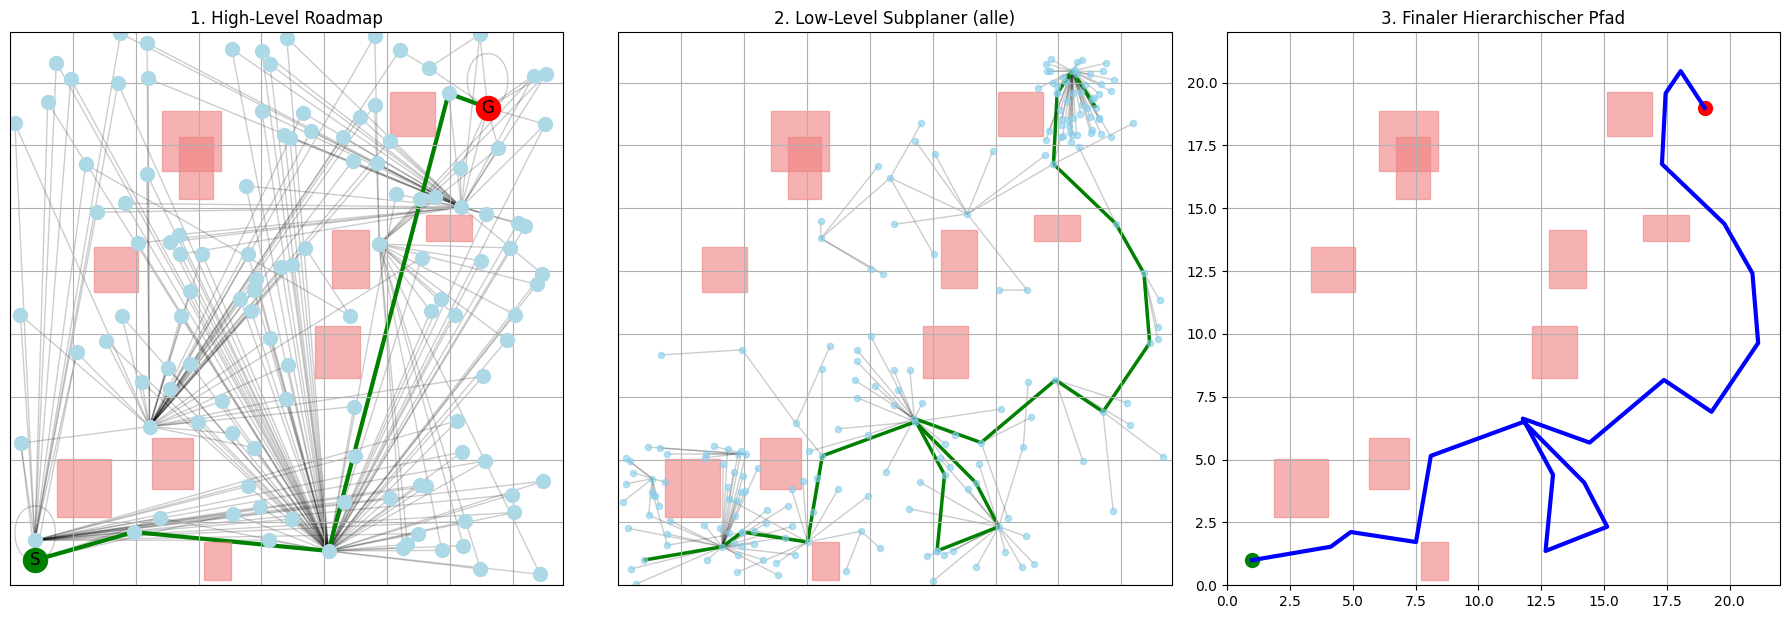

In [13]:
# --- Pfadplanung ---
path = hier_planner.plan_path(start, goal)
if not path:
    print("❌ Kein Pfad gefunden.")
else:
    print("✅ Pfad gefunden mit", len(path), "Punkten")

    # Korrekte Reihenfolge der Initialisierung für die Visualisierung
    hier_planner.solution_path = path  # Statt final_path
    hier_planner.graph = hier_planner.global_planner.graph  # Verwende direkt den globalen Planer-Graph

    collision_checker = CollisionChecker(hier_planner.scene, hier_planner.limits)
    visualize_hierarchical_planning(hier_planner, collision_checker, hier_planner.config_local)


In [14]:
# --- Jede Szene durchlaufen ---
for name, (scene, limits, (start_tuple, goal_tuple)) in scenes:
    print(f"\n🔄 Verarbeite Szene: {name}")

    # Start- und Zielposition ins passende Format bringen
    start = [list(start_tuple)]
    goal = [list(goal_tuple)]

    # Kollisionserkennung
    collision_checker = CollisionChecker(scene, limits)

    # Planer initialisieren
    hier_planner = HierarchicalPlanner(
        scene=scene,
        limits=limits,
        GlobalPlannerClass=VisibilityPRM,
        LocalPlannerClass=LazyPRM,
        config_global=config_high,
        config_local=config_low
    )

    # Pfadplanung
    path = hier_planner.plan_path(start, goal)
    if not path:
        print(f"❌ Kein Pfad gefunden in Szene: {name}")
        continue
    else:
        print(f"✅ Pfad gefunden in Szene: {name}, Länge: {len(path)}")

    # Visualisierung vorbereiten (optional, kann deaktiviert werden)
    hier_planner.solution_path = path
    hier_planner.graph = hier_planner.global_planner.graph
    visualize_hierarchical_planning(hier_planner, collision_checker, config_low)

    # Alternativ: Ergebnisse speichern oder zusammenfassen


🔄 Verarbeite Szene: U-Shape
Globaler Pfad: ['start', 36, 5, 95, 'goal']
Koordinaten des globalen Pfads: [[2.0, 20.0], array([0.10511069, 7.19141113]), array([14.96967367,  5.69176635]), array([20.60102365,  2.44072942]), [20.0, 2.0]]
Segment 0: [2.0, 20.0] → [0.10511069 7.19141113]
→ Lokaler Planner für Segment 0: [2.0, 20.0] → [0.10511069 7.19141113]
   Lokale Begrenzung (geclipped): ((0, np.float64(9.052555342609816)), (np.float64(5.5957055653901655), np.float64(21.595705565390166)))


KeyError: 'initialRoadmapSize'